
# Callum's Model, Compare with Todd

In [1]:
import os
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"]="6"
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.layers import Dense, Conv2D, Flatten, Dropout
import ptetaphi_nn
import tools
with open("filepath.txt", 'r') as f:
    filename = f.read().strip("\n")
    
s_table = tools.open_file(filename, sort_by="tag")
print(len(s_table.resolved_lv.pt), 'total events')

Using TensorFlow backend.


sorting data by tag
777150 total events


In [2]:
nt3 = s_table.nbtags==3  # 3 b tags
events = s_table[nt3]
print(len(events), 'events with 3 tags')


cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)

# then ensure require pt >= 40 and |eta| <= 2.5
#pt_filter = events.resolved_lv.pt < 40
#events.resolved_lv.pt[pt_filter] = 0
#events.resolved_lv.eta[pt_filter] = 0
#events.resolved_lv.phi[pt_filter] = 0

#eta_filter = (events.resolved_lv.eta >= -2.5) & (events.resolved_lv.eta >= 2.5)
#events.resolved_lv.pt[eta_filter] = 0
#events.resolved_lv.eta[eta_filter] = 0
#events.resolved_lv.phi[eta_filter] = 0
#print(events.resolved_lv.pt[0])
#print(events.tag[0])
#print(len(events))

313660 events with 3 tags


In [3]:
nn = ptetaphi_nn.PtEtaPhiNN(events, load=("models/architecture_06_07_2020.json", "models/weights_06_07_2020.h5"), njets=10, chop=0)
#nn = ptetaphi_nn.PtEtaPhiNN(events, load=("models/architecture_02_07_2020.json", "models/weights_02_07_2020.h5"), njets=10, chop=0)
#nn = ptetaphi_nn.PtEtaPhiNN(events, load=("models/architecture_2b.json", "models/weights_2b.h5"), njets=10)
nn.model.summary()

Loading model... 
Using architecture: models/architecture_06_07_2020.json 
and weights: models/weights_06_07_2020.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
___

100%|██████████| 313660/313660 [00:02<00:00, 130797.44it/s]


overall accuracy: 85.56 percent
ignoring 2.61 percent (8197 events) of 313660 events


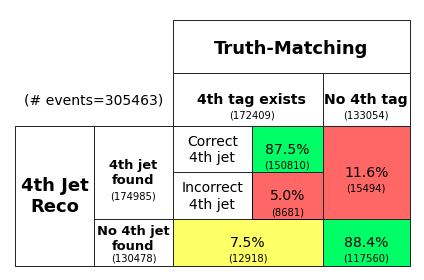

In [4]:
#import awkward
#import uproot_methods as urm
#import importlib
#importlib.reload(tools)

#one_event = awkward.Table()

#for index in range(12):
#    lv = urm.TLorentzVectorArray.from_ptetaphie(events.resolved_lv.pt[index].reshape(1, -1),
#                                                events.resolved_lv.eta[index].reshape(1, -1),
#                                                events.resolved_lv.phi[index].reshape(1, -1),
#                                                events.resolved_lv.E[index].reshape(1, -1))

#    one_event.resolved_lv = lv
#    one_event.truth = events.truth[index].reshape(1, -1)
#    one_event.tag = events.tag[index].reshape(1, -1)

#    selections = nn.evaluate(one_event, output=None)[0]
#    print(f"Event {index}")
#    print("|Tag|Truth|Sel|pt")
#    for i in range(events.njets[index]):
#        print(f"| {events.truth[index][i]} |  {events.tag[index][i]}  | {selections[i]} | {events.resolved_lv.pt[index][i]:.3f}")
#    print()
selections = nn.evaluate(events)

0
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]

1
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

2
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

3
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

4
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

5
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

6
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

7
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

8
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]

9
[1 1 1 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]



100%|██████████| 313660/313660 [00:02<00:00, 134205.08it/s]


overall accuracy: 85.56 percent
ignoring 2.61 percent (8197 events) of 313660 events


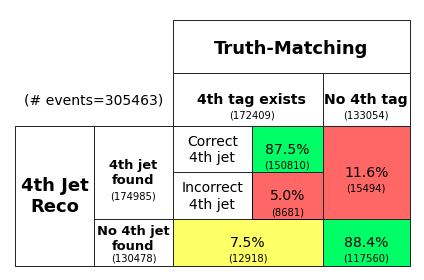

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
import numpy as np
import importlib
importlib.reload(tools)

truth = events.truth
tag = events.tag

# GIVE THE CSV FROM HERE NOT ABOVE!
nn_inputs = tools.scale_nn_input(events, chop=0, save_csv="models/scaling_parameters_06_07_2020_v2")

#np.save('nn_inputs_callum.npy', nn_inputs)

scores = nn.model.predict(nn_inputs)

#np.save('scores_callum.npy', scores)


# convert nn scores into "selections"
select=np.argmax(scores,axis=-1)
selections = np.zeros((len(scores), len(tag[0])+1), dtype=int)
for i, s in enumerate(select):
    selections[i][s+3] = 1
# chop off the last "no selection" jet
selections = selections[:,:-1]

for i in range(10):
    print(i)
    print(tag[i])
    print(truth[i])
    print(selections[i])
    print()

tools.evaluate_model(truth, tag, selections)

In [6]:
i_to_compare = 297
print("Event",i_to_compare)
print("Inputs",nn_inputs[i_to_compare])
print("Outputs")
for j in range(len(scores[i_to_compare])):
    print("  ",j,round(scores[i_to_compare][j],4))
print("")

Event 297
Inputs [-6.18521214e-01 -1.88911140e-01  1.77924782e-02 -3.27163842e-03
  2.31345296e-01  2.48493180e-01  1.06336164e+00 -3.29360187e-01
 -1.94782004e-01 -1.10037595e-01  7.36411512e-01  5.15906364e-02
  1.81509364e+00  1.71740949e+00  6.52299374e-02  1.37767816e+00
 -8.48666608e-01 -2.05967342e-03  1.09038805e-03 -2.64976034e-03
 -5.47137439e-01 -2.64361918e-01  1.04922152e+00  1.49571919e+00
 -1.61229396e+00  9.07914102e-01  8.25049222e-01 -4.05969005e-03
  1.08107866e-03  2.81306473e-03]
Outputs
   0 0.9297
   1 0.0064
   2 0.0585
   3 0.0
   4 0.0
   5 0.0
   6 0.0
   7 0.0054

